## Caso Practico - Prediccion de precio de casas

En este dataset cada fila expresa las propiedades de una casa y el precio de la misma. La idea es generar un modelo que nos prediga el precio de las casas en base a ciertas caracteristicas de la misma.

In [1]:
# importamos las librerias

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# vamos a crear una funcion para que entrene el modelo y nos devuelva el valor de RMSE

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from math import sqrt

In [3]:
# cargamos el dataframe

data = pd.read_csv('AmesHousing.txt', delimiter="\t")
data_orig = data.copy()

#### Los Datos

Para simplificar el entendimiento voy a dejar un breve diccionario de que significa cada uno de los campos que vamos
a usar para el analisis:

* Diccionario_columnas

Si queremos un entendimiento mas profundo sobre cada una de las columnas dirigirse a la documentacion oficial:

[link a doc oficial](https://s3.amazonaws.com/dq-content/307/data_description.txt)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

### Hagamos una exploracion muy rapida

In [6]:
# veamos la cantidad de valores nulos que tenemos por columnas
pd.options.display.max_rows = 85
data.isna().sum().sort_values(ascending=False)

Pool QC            2917
Misc Feature       2824
Alley              2732
Fence              2358
Fireplace Qu       1422
Lot Frontage        490
Garage Qual         159
Garage Yr Blt       159
Garage Cond         159
Garage Finish       159
Garage Type         157
Bsmt Exposure        83
BsmtFin Type 2       81
BsmtFin Type 1       80
Bsmt Cond            80
Bsmt Qual            80
Mas Vnr Type         23
Mas Vnr Area         23
Bsmt Full Bath        2
Bsmt Half Bath        2
Garage Area           1
Garage Cars           1
Total Bsmt SF         1
Bsmt Unf SF           1
BsmtFin SF 2          1
BsmtFin SF 1          1
Electrical            1
Exterior 2nd          0
Exterior 1st          0
Roof Matl             0
Roof Style            0
Year Remod/Add        0
Year Built            0
SalePrice             0
Overall Cond          0
Overall Qual          0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Area              0
Street                0
Lot Shape       

In [10]:
# podemos establecer una definicion propia, decimos que si los datos tienen mas del 80% de valores nulos entonces no nos
# sirve

mascara = ((data.isna().sum() / data.shape[0])*100) < 80


In [12]:
#data.loc[:,mascara]
data = data.loc[:,mascara].copy()

In [14]:
# veamos si hay valores duplicados, nos basamos en la columna PID, que es Property ID
# y debe ser unico para cada casa, sino estaremos ante casas repetidas

data['PID'].nunique()

2930

## Organizacion del codigo

Trabajar con Jupyter notebook es muy dinamico pero a la vez muy desorganizado, por lo que vamos a dividir nuestro codigo en 
3 funciones para simplificar.


* Transformacion

* Seleccion

* Entrenamiento y testeo

In [15]:
    
def transformacion(df):
    '''
    Operaciones que afecten los valores del df, como relleno de nulos, eliminar filas, mapeos, reemplazo de valores, etc
    NO INCLUIMOS LA ELIMINACION DE COLUMNAS ENTERAS
    '''
    return df

def seleccion(df):
    '''
    Seleccion de aquellas features o columnas que se van a utilizar para el entrenamiento del modelo
    '''
    return df[["Full Bath", "SalePrice"]]

def entrenar_testear(df):
    '''
    Instanciar el modelo, entrenarlo y luego evaluarlo
    '''
    lr = LinearRegression()
    
    X_train, X_test, y_train, y_test = train_test_split(df.drop("SalePrice",axis=1), df['SalePrice'],
                                                        test_size=0.30, random_state=38)
    
    lr.fit(X_train,y_train)
    
    train_predictions = lr.predict(X_train)
    test_predictions = lr.predict(X_test)
    
    train_rmse_2 = np.sqrt(mean_squared_error(train_predictions, y_train))
    test_rmse_2 = np.sqrt(mean_squared_error(test_predictions, y_test))
    
    print(f"El error de train es {train_rmse_2}")
    print(f"El error de test es {test_rmse_2}")
    

In [16]:
data_transformada = transformacion(data)
data_filtrada = seleccion(data_transformada)
entrenar_testear(data_filtrada)

El error de train es 66581.0026484582
El error de test es 67769.25613651356


### Variables numericas

In [18]:
# veamos cuales son las columnas numericas, vamos a basarnos en ellas para el modelado
pd.options.display.max_columns = 85

data_numerica = data.select_dtypes(include=[np.number]).copy()

In [ ]:
# vemos que de entrada hay varias variables numericas que podemos usar para el modelo, pero tenemos que elegir cuales
# para hacer un mejor analisis

# podriamos pasar todo como viene? si podriamos, rellenando o eliminando los valores nulos, pero a continuacion vamos
# a tratar de ver que nos sirve y que no

In [ ]:
# veamos las correlaciones con el target para ver que variables o features describen de mejor manera el comportamiento
# de nuestro target

In [22]:
#data_numerica.corr()
#data_numerica.corr()['SalePrice']
#data_numerica.corr()['SalePrice'].sort_values()
data_numerica.corr()['SalePrice'].abs().sort_values()

BsmtFin SF 2       0.005891
Misc Val           0.015691
Yr Sold            0.030569
Order              0.031408
3Ssn Porch         0.032225
Mo Sold            0.035259
Bsmt Half Bath     0.035835
Low Qual Fin SF    0.037660
Pool Area          0.068403
MS SubClass        0.085092
Overall Cond       0.101697
Screen Porch       0.112151
Kitchen AbvGr      0.119814
Enclosed Porch     0.128787
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
PID                0.246521
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0

In [24]:
# como regla general podemos tomar como umbral una correlacion superior a 0.3, es buena practica ir ajustando
# este numero y probando la performance del modelo

umbral = 0.3
# data_numerica.corr()['SalePrice'].abs() >= umbral
col_num_utiles = data_numerica.corr()['SalePrice'].abs() >= umbral

In [26]:
data_numerica = data_numerica.loc[:,col_num_utiles].copy()

In [27]:
data_numerica.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Frontage    2440 non-null   float64
 1   Overall Qual    2930 non-null   int64  
 2   Year Built      2930 non-null   int64  
 3   Year Remod/Add  2930 non-null   int64  
 4   Mas Vnr Area    2907 non-null   float64
 5   BsmtFin SF 1    2929 non-null   float64
 6   Total Bsmt SF   2929 non-null   float64
 7   1st Flr SF      2930 non-null   int64  
 8   Gr Liv Area     2930 non-null   int64  
 9   Full Bath       2930 non-null   int64  
 10  TotRms AbvGrd   2930 non-null   int64  
 11  Fireplaces      2930 non-null   int64  
 12  Garage Yr Blt   2771 non-null   float64
 13  Garage Cars     2929 non-null   float64
 14  Garage Area     2929 non-null   float64
 15  Wood Deck SF    2930 non-null   int64  
 16  Open Porch SF   2930 non-null   int64  
 17  SalePrice       2930 non-null   i

### Tratamiento de valores nulos

In [28]:
data_numerica.isna().sum().sort_values(ascending=False)

Lot Frontage      490
Garage Yr Blt     159
Mas Vnr Area       23
Total Bsmt SF       1
Garage Area         1
Garage Cars         1
BsmtFin SF 1        1
Overall Qual        0
Year Built          0
Year Remod/Add      0
SalePrice           0
1st Flr SF          0
Open Porch SF       0
Full Bath           0
TotRms AbvGrd       0
Fireplaces          0
Wood Deck SF        0
Gr Liv Area         0
dtype: int64

In [29]:
# analicemos estas 3 variables para ver que hacer con los nulos
# veamos que porcentaje de nulos es 490

490/data.shape[0]

0.16723549488054607

In [30]:
# su correlacion con el target?

data_numerica.corr().loc['Lot Frontage','SalePrice']

0.35731791014236447

In [32]:
data_numerica.drop('Lot Frontage',inplace=True,axis=1)

In [33]:
# volvemos a chequear por las otras variables con valores nulos
data_numerica.isna().sum().sort_values(ascending=False)

Garage Yr Blt     159
Mas Vnr Area       23
Garage Area         1
Garage Cars         1
BsmtFin SF 1        1
Total Bsmt SF       1
SalePrice           0
1st Flr SF          0
Year Built          0
Year Remod/Add      0
Full Bath           0
Gr Liv Area         0
Open Porch SF       0
TotRms AbvGrd       0
Fireplaces          0
Wood Deck SF        0
Overall Qual        0
dtype: int64

In [ ]:
# vamos a dejar el analisis del Garage Yr Blt para mas adelante y nos vamos a entrar en las otras columnas con valores
# nulos



In [37]:
#data_numerica.loc[:,'Mas Vnr Area']
#data_numerica.loc[:,'Mas Vnr Area'].hist(bins=100)
data_numerica.loc[:,'Mas Vnr Area'].value_counts()

0.0      1748
120.0      15
176.0      13
200.0      13
216.0      12
         ... 
518.0       1
109.0       1
440.0       1
322.0       1
175.0       1
Name: Mas Vnr Area, Length: 445, dtype: int64

In [ ]:
# OJO ACA ENTONCES, VAMOS A HACER UNA TRANSFORMACION, Y NO SOBRE NUESTRO DF ORIGINAL
# TENEMOS QUE LLEVAR REGISTRO DE ESTAS COSAS PORQUE VAN A TENER QUE HACERSE SIEMPRE QUE QUERRAMOS ENTRENAR EL MODELO
# YA QUE AL SER REGRESION LINEAL NO PODEMOS CONTAR CON VALORES NULOS

In [42]:
mediana = data_numerica.loc[:,'Mas Vnr Area'].median()

In [45]:
data_numerica.loc[:,'Mas Vnr Area'] = data_numerica.loc[:,'Mas Vnr Area'].fillna(mediana).copy()

In [46]:
# para los otros casos vamos a tirar las filas que contengan nulo en estos campos

data_numerica.dropna(axis=0,subset=['Garage Area','Garage Cars','BsmtFin SF 1','Total Bsmt SF'],inplace=True)

In [47]:
data_numerica.shape

(2928, 17)

### Colinearidad

In [49]:
#data_numerica[['Garage Yr Blt','Year Built','Year Remod/Add']]

# y aca vemos que estas variables nos dan informacion muy similar, lo que nos lleva a otro analisis. El de correlacion
# entre variables, para evitar COLINEARIDAD

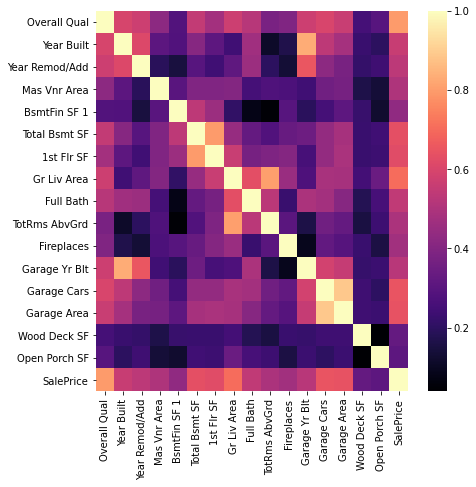

In [52]:
plt.figure(figsize=(7,7))
sns.heatmap(data_numerica.corr(),cmap='magma')

In [ ]:
# vemos que hay  pares de variables que estan muy correlacionadas entre si, de ellas tenemos que elegir solo 1


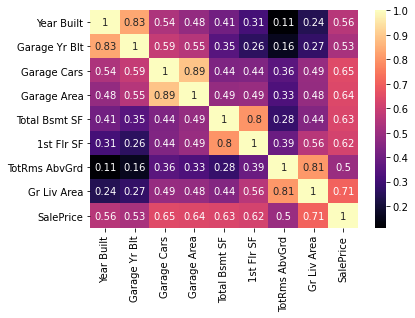

In [53]:
# hagamos uno con anotaciones de las variables mas correlacionadas para ver cual tiene mas correlacion con el target
#(es decir cual describe mejor al target)

lista = ['Year Built','Garage Yr Blt','Garage Cars','Garage Area','Total Bsmt SF','1st Flr SF','TotRms AbvGrd'
        ,'Gr Liv Area','SalePrice']

colineales = data_numerica[lista].corr()

sns.heatmap(colineales,annot=True,cmap='magma')

In [54]:
lista_eliminar = ['Garage Yr Blt','Garage Area','1st Flr SF','TotRms AbvGrd']
data_numerica.drop(lista_eliminar,axis=1,inplace=True)

In [55]:
data_numerica.columns.to_list()

['Overall Qual',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'Total Bsmt SF',
 'Gr Liv Area',
 'Full Bath',
 'Fireplaces',
 'Garage Cars',
 'Wood Deck SF',
 'Open Porch SF',
 'SalePrice']

In [ ]:
# volvamos a entrenar el modelo con estos cambios, para ello tenemos que modificar las funciones de transformacion y
# seleccion respectivamente

In [56]:
def transformacion(df):
    '''
    Operaciones que afecten los valores del df, como relleno de nulos, eliminar filas, mapeos, reemplazo de valores, etc
    '''
    mediana = df.loc[:,'Mas Vnr Area'].median()
    df.loc[:,'Mas Vnr Area'] =  df.loc[:,'Mas Vnr Area'].fillna(mediana)
    
    df.dropna(axis=0,subset=['Garage Area','Garage Cars','BsmtFin SF 1','Total Bsmt SF'],inplace=True)
    
    return df

def seleccion(df):
    '''
    Seleccion de aquellas features o columnas que se van a utilizar para el entrenamiento del modelo
    '''
    return df[['Overall Qual','Year Built','Year Remod/Add','Mas Vnr Area','BsmtFin SF 1','Total Bsmt SF',
               'Full Bath','TotRms AbvGrd','Fireplaces','Garage Cars','Wood Deck SF','Open Porch SF','SalePrice']]


def entrenar_testear(df):
    '''
    Instanciar el modelo, entrenarlo y luego evaluarlo
    '''
    lr = LinearRegression()
    
#   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
    X_train, X_test, y_train, y_test = train_test_split(df.drop("SalePrice",axis=1), df['SalePrice'],
                                                        test_size=0.30, random_state=38)
    lr.fit(X_train,y_train)
    
    train_predictions = lr.predict(X_train)
    test_predictions = lr.predict(X_test)
    
    train_rmse_2 = np.sqrt(mean_squared_error(train_predictions, y_train))
    test_rmse_2 = np.sqrt(mean_squared_error(test_predictions, y_test))
    
    print(f"El error de train es {train_rmse_2}")
    print(f"El error de test es {test_rmse_2}")

In [57]:

data_transformada = transformacion(data_orig)
data_filtrada = seleccion(data_transformada)
entrenar_testear(data_filtrada)

El error de train es 38521.7066807406
El error de test es 30701.359251353795


### Varianza de las features


Ahora veamos lo de varianza

Cuando una feature tiene una varianza muy baja, quiere decir que su valor no cambia mucho entre filas, lo cual indica
que esta columna va a tener siempre el mismo valor y eso no va a tener poder predictivo y debemos eliminarla 

Para comparar las varianzas entre las distintas columnas necesitamos reescalar los datos para que sus valores varien entre
0 y 1, de esta manera podemos hacer la comparacion.

Para ello usamos la formula conocida como min-max scaling

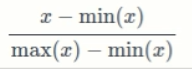

* x es un valor individual
* min(x) es el valor minimo de la columna a la cual pertenece x
* max(x) es el valor maximo de la columna a la cual pertenece x

In [61]:
# vamos a hacer esto para cada una de las columnas que nos queda en nuestro dataframe
varian = (data_numerica - data_numerica.min())/( data_numerica.max() - data_numerica.min())

In [62]:
varian.max()

Overall Qual      1.0
Year Built        1.0
Year Remod/Add    1.0
Mas Vnr Area      1.0
BsmtFin SF 1      1.0
Total Bsmt SF     1.0
Gr Liv Area       1.0
Full Bath         1.0
Fireplaces        1.0
Garage Cars       1.0
Wood Deck SF      1.0
Open Porch SF     1.0
SalePrice         1.0
dtype: float64

In [63]:
varian.min()

Overall Qual      0.0
Year Built        0.0
Year Remod/Add    0.0
Mas Vnr Area      0.0
BsmtFin SF 1      0.0
Total Bsmt SF     0.0
Gr Liv Area       0.0
Full Bath         0.0
Fireplaces        0.0
Garage Cars       0.0
Wood Deck SF      0.0
Open Porch SF     0.0
SalePrice         0.0
dtype: float64

In [65]:
# ahora vamos a calcular la varianza y veamos que tenemos

varian.var().sort_values()

Total Bsmt SF     0.005202
BsmtFin SF 1      0.006518
Wood Deck SF      0.007877
Open Porch SF     0.008274
Gr Liv Area       0.009070
SalePrice         0.011586
Mas Vnr Area      0.012471
Full Bath         0.019111
Garage Cars       0.023138
Overall Qual      0.024573
Fireplaces        0.026240
Year Built        0.048014
Year Remod/Add    0.120826
dtype: float64

In [ ]:
# en este caso no vamos a remover ninguna, pero es cuestion de ir probando que funciona mejor

### Variables numericas que requieren modificacion



In [ ]:
# que pasa con las variables de los anios, por si solas son numeros que no indican mucho, que pasa si podemos hacer
# que estos numeros sean mas significativos

# lo que pasa es que estos valores no son realmente representativos de la antiguedad de una casa, por ejemplo, si una casa
# se construyo en 1960 y se vende en 1980, y otra se vende en el 2000 , la segunda es el doble de antigua, y esto no se
# ve reflejado en estos numeros.

# entonces en vez de los años en los que los eventos sucedieron, nosotros queremos la diferencia entre esos años

# por ejemplo la antiguedad de la casa en años al momento de venderla

In [67]:
data['Years Before Sale'] = data['Yr Sold'] - data['Year Built']

In [68]:
data.loc[data['Years Before Sale'] < 0,'Years Before Sale']

2180   -1
Name: Years Before Sale, dtype: int64

In [69]:
years_since_remod = data['Yr Sold'] - data['Year Remod/Add']
years_since_remod[years_since_remod < 0]

1702   -1
2180   -2
2181   -1
dtype: int64

In [70]:
## Create new columns
data['Years Since Remod'] = years_since_remod

In [71]:
data = data.drop([1702, 2180, 2181], axis=0)

In [72]:
# no necesitamos mas las columnas de los anios
data = data.drop(["Year Built", "Year Remod/Add",'Yr Sold'], axis = 1)

In [ ]:
# modificamos las funciones para estos cambios

In [73]:
def transformacion(df):
    '''
    Operaciones que afecten los valores del df, como relleno de nulos, eliminar filas, mapeos, reemplazo de valores, etc
    '''
    mediana = df.loc[:,'Mas Vnr Area'].median()
    df.loc[:,'Mas Vnr Area'] =  df.loc[:,'Mas Vnr Area'].fillna(mediana)
    
    df.dropna(axis=0,subset=['Garage Area','Garage Cars','BsmtFin SF 1','Total Bsmt SF'],inplace=True)
    
    df['Years Before Sale'] = df['Yr Sold'] - df['Year Built']
    
    years_since_remod = df['Yr Sold'] - df['Year Remod/Add']
    df['Years Since Remod'] = years_since_remod
    
    df = df.drop([1702, 2180, 2181], axis=0)

    return df

def seleccion(df):
    '''
    Seleccion de aquellas features o columnas que se van a utilizar para el entrenamiento del modelo
    '''
    return df[['Overall Qual','Mas Vnr Area','Years Since Remod','Years Before Sale','BsmtFin SF 1','Total Bsmt SF',
               'Full Bath','TotRms AbvGrd','Fireplaces','Garage Cars','Wood Deck SF','Open Porch SF','SalePrice']]

def entrenar_testear(df):
    '''
    Instanciar el modelo, entrenarlo y luego evaluarlo
    '''
    lr = LinearRegression()
    
#   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
    X_train, X_test, y_train, y_test = train_test_split(df.drop("SalePrice",axis=1), df['SalePrice'],
                                                        test_size=0.30, random_state=38)
    lr.fit(X_train,y_train)
    
    train_predictions = lr.predict(X_train)
    test_predictions = lr.predict(X_test)
    
    train_rmse_2 = np.sqrt(mean_squared_error(train_predictions, y_train))
    test_rmse_2 = np.sqrt(mean_squared_error(test_predictions, y_test))
    
    print(f"El error de train es {train_rmse_2}")
    print(f"El error de test es {test_rmse_2}")

In [74]:

data_transformada = transformacion(data_orig)
data_filtrada = seleccion(data_transformada)
entrenar_testear(data_filtrada)

El error de train es 35252.865835358
El error de test es 34266.78225375318


### Variables innecesarias y leakage

Hay que eliminar las variables que:
- no sirven para el algoritmo, porque no tienen que ver con el problema
- variables leakage, que son aquellas que filtran datos sobre la venta (son spoilers)

 Las **variables leakage** son variables que no vamos a tener a la hora de hacer la prediccion, por lo que no tenemos que tenerlas en cuenta
a la hora de entrenar el modelo, por mas interesantes que sean !!!

In [ ]:
# variables leakage
# son variables que no vamos a tener a la hora de hacer la prediccion, por lo que no tenemos que tenerlas en cuenta
# a la hora de entrenar el modelo, por mas interesantes que sean !!!

In [75]:
## Columnas no utiles para ML
data = data.drop(["PID", "Order"], axis=1)

## Variables Leakage
data = data.drop(["Mo Sold", "Sale Condition", "Sale Type"], axis=1)

### Outliers

El manejo de outliers es importante debido a que dichos valores afectan la precision de nuestro modelo, hay distintas formas de tratarlos y dependen mucho del problema a abordar (pueden ser ouliers por error de tipografia o por datos reales pero atipicos)

In [ ]:
# solo para ejemplificar vamos a tomar como ourlier a los valores que se encuentren por encima del percentil 98 y
# los vamos a reemplazar por el valor en el percentil 98

In [76]:
data_numerica.columns

Index(['Overall Qual', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'Total Bsmt SF', 'Gr Liv Area', 'Full Bath',
       'Fireplaces', 'Garage Cars', 'Wood Deck SF', 'Open Porch SF',
       'SalePrice'],
      dtype='object')

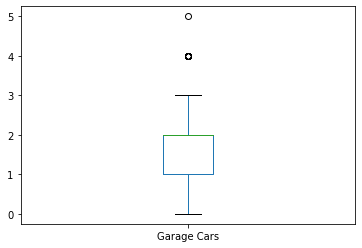

In [77]:
data_numerica['Garage Cars'].plot(kind='box')

In [78]:
data_numerica['Garage Cars'].value_counts()

2.0    1603
1.0     777
3.0     374
0.0     157
4.0      16
5.0       1
Name: Garage Cars, dtype: int64

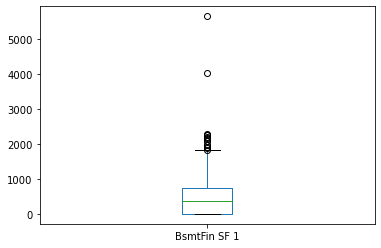

In [79]:
data_numerica['BsmtFin SF 1'].plot(kind='box')

In [80]:
data_numerica['BsmtFin SF 1'].value_counts()

0.0       930
24.0       27
16.0       14
300.0       9
384.0       8
         ... 
1375.0      1
1332.0      1
1359.0      1
373.0       1
859.0       1
Name: BsmtFin SF 1, Length: 995, dtype: int64

In [81]:
data_numerica['BsmtFin SF 1'].quantile(0.98)

1474.92

In [82]:
limite = data_numerica['BsmtFin SF 1'].quantile(0.98)
mask = data_numerica['BsmtFin SF 1']>limite
data_numerica.loc[mask,'BsmtFin SF 1'] = limite

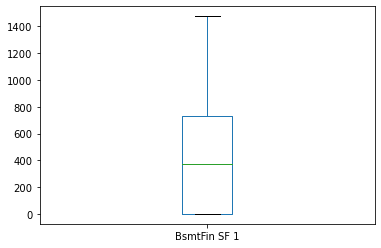

In [83]:
data_numerica['BsmtFin SF 1'].plot(kind="box")

In [ ]:
# supongamos que seguimos haciendo este analisis y
# decidimos hacer esta transformacion sobre las features BsmtFin SF 1', 'Total Bsmt SF', 'Full Bath', 'TotRms AbvGrd', 'Open Porch SF',

In [85]:
features = ['BsmtFin SF 1', 'Total Bsmt SF', 'Full Bath', 'Open Porch SF']
for col in features:
    limite = data_numerica[col].quantile(0.98)
    mask = data_numerica[col]>limite
    data_numerica.loc[mask,col] = limite

In [ ]:
# veamos si esto implica sonbre la performance del modelo

In [86]:
def transformacion(df):
    '''
    Operaciones que afecten los valores del df, como relleno de nulos, eliminar filas, mapeos, reemplazo de valores, etc
    '''
    mediana = df.loc[:,'Mas Vnr Area'].median()
    df.loc[:,'Mas Vnr Area'] =  df.loc[:,'Mas Vnr Area'].fillna(mediana)
    
    df.dropna(axis=0,subset=['Garage Area','Garage Cars','BsmtFin SF 1','Total Bsmt SF'],inplace=True)
    
    df['Years Before Sale'] = df['Yr Sold'] - df['Year Built']
    
    years_since_remod = df['Yr Sold'] - df['Year Remod/Add']
    df['Years Since Remod'] = years_since_remod
    
    df = df.drop([1702, 2180, 2181], axis=0)
    
    features = ['BsmtFin SF 1', 'Total Bsmt SF', 'Full Bath', 'TotRms AbvGrd', 'Open Porch SF']
    for col in features:
        limite = df[col].quantile(0.98)
        mask = df[col]>limite
        df.loc[mask,col] = limite
    
    return df

def seleccion(df):
    '''
    Seleccion de aquellas features o columnas que se van a utilizar para el entrenamiento del modelo
    '''
    return df[['Overall Qual','Mas Vnr Area','Years Since Remod','Years Before Sale','BsmtFin SF 1','Total Bsmt SF',
               'Full Bath','TotRms AbvGrd','Fireplaces','Garage Cars','Wood Deck SF','Open Porch SF','SalePrice']]

def entrenar_testear(df):
    '''
    Instanciar el modelo, entrenarlo y luego evaluarlo
    '''
    lr = LinearRegression()
    
#   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
    X_train, X_test, y_train, y_test = train_test_split(df.drop("SalePrice",axis=1), df['SalePrice'],
                                                        test_size=0.30, random_state=38)
    lr.fit(X_train,y_train)
    
    train_predictions = lr.predict(X_train)
    test_predictions = lr.predict(X_test)
    
    train_rmse_2 = np.sqrt(mean_squared_error(train_predictions, y_train))
    test_rmse_2 = np.sqrt(mean_squared_error(test_predictions, y_test))
    
    print(f"El error de train es {train_rmse_2}")
    print(f"El error de test es {test_rmse_2}")

In [87]:

data_transformada = transformacion(data_orig)
data_filtrada = seleccion(data_transformada)
entrenar_testear(data_filtrada)

El error de train es 34663.56332277974
El error de test es 35160.85122189317


### Variables categoricas

    Tenemos que incluirlas en el modelo, puede que traiga buenos resultados, pero cuales incluimos? Que criterio tomamos?

In [88]:
# primero veamos cuales son las variables categoricas que tenemos 
data.select_dtypes('object').columns

Index(['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive'],
      dtype='object')

In [89]:
data['House Style'].value_counts()

1Story    1480
2Story     871
1.5Fin     314
SLvl       128
SFoyer      83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: House Style, dtype: int64

In [90]:
data['Electrical'].value_counts()

SBrkr    2679
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [91]:
nominal_features=data.select_dtypes('object').columns.to_list()

In [92]:
## Veamos que variables categoricas todavia permancen en nuestro dataframe
transform_cat_cols = []
for col in nominal_features:
    if col in data.columns:
        transform_cat_cols.append(col)

In [94]:
#data[transform_cat_cols].apply(lambda col: col.nunique())
uniqueness_counts = data[transform_cat_cols].apply(lambda col: col.nunique()).sort_values()

In [97]:
drop_nonuniq_cols = uniqueness_counts[uniqueness_counts > 6].index

In [98]:
data = data.drop(drop_nonuniq_cols, axis=1)

In [99]:
data.select_dtypes('object').columns

Index(['Street', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Bldg Type', 'Roof Style', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Fireplace Qu',
       'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond',
       'Paved Drive'],
      dtype='object')

In [101]:
columnas_object = data.select_dtypes('object').columns.to_list()

In [103]:
#data[columnas_object].isna().sum()

#es importante tratar esto

In [109]:
#pd.get_dummies(data[['Foundation','Street']],drop_first=True)
pd.get_dummies(data[columnas_object],drop_first=True)

,Street_Pave,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_NoSeWa,Utilities_NoSewr,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Mod,Land Slope_Sev,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Mas Vnr Type_BrkFace,Mas Vnr Type_CBlock,Mas Vnr Type_None,Mas Vnr Type_Stone,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Exter Cond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Bsmt Qual_Fa,Bsmt Qual_Gd,...,BsmtFin Type 2_LwQ,BsmtFin Type 2_Rec,BsmtFin Type 2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating QC_Fa,Heating QC_Gd,Heating QC_Po,Heating QC_TA,Central Air_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_Po,Kitchen Qual_TA,Fireplace Qu_Fa,Fireplace Qu_Gd,Fireplace Qu_Po,Fireplace Qu_TA,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Finish_RFn,Garage Finish_Unf,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_Po,Garage Qual_TA,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_Po,Garage Cond_TA,Paved Drive_P,Paved Drive_Y
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0
1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1
3,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
4,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,...,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1
2926,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1
2927,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,...,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2928,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1


In [110]:
pd.concat([
    data, 
    pd.get_dummies(data[columnas_object],drop_first=True)],
    axis=1).drop(columnas_object,axis=1)

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice,Years Before Sale,Years Since Remod,Street_Pave,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,...,BsmtFin Type 2_LwQ,BsmtFin Type 2_Rec,BsmtFin Type 2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating QC_Fa,Heating QC_Gd,Heating QC_Po,Heating QC_TA,Central Air_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_Po,Kitchen Qual_TA,Fireplace Qu_Fa,Fireplace Qu_Gd,Fireplace Qu_Po,Fireplace Qu_TA,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Finish_RFn,Garage Finish_Unf,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_Po,Garage Qual_TA,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_Po,Garage Cond_TA,Paved Drive_P,Paved Drive_Y
0,20,141.0,31770,6,5,112.0,639.0,0.0,441.0,1080.0,1656,0,0,1656,1.0,0.0,1,0,3,1,7,2,1960.0,2.0,528.0,210,62,0,0,0,0,0,215000,50,50,1,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0
1,20,80.0,11622,5,6,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,105000,49,49,1,0,0,1,0,0,1,...,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1
2,20,81.0,14267,6,6,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,172000,52,52,1,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1
3,20,93.0,11160,7,5,0.0,1065.0,0.0,1045.0,2110.0,2110,0,0,2110,1.0,0.0,2,1,3,1,8,2,1968.0,2.0,522.0,0,0,0,0,0,0,0,244000,42,42,1,0,0,1,0,0,1,...,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
4,60,74.0,13830,5,5,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,189900,13,12,1,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,37.0,7937,6,6,0.0,819.0,0.0,184.0,1003.0,1003,0,0,1003,1.0,0.0,1,0,3,1,6,0,1984.0,2.0,588.0,120,0,0,0,0,0,0,142500,22,22,1,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1
2926,20,NaN,8885,5,5,0.0,301.0,324.0,239.0,864.0,902,0,0,902,1.0,0.0,1,0,2,1,5,0,1983.0,2.0,484.0,164,0,0,0,0,0,0,131000,23,23,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1
2927,85,62.0,10441,5,5,0.0,337.0,0.0,575.0,912.0,970,0,0,970,0.0,1.0,1,0,3,1,6,0,NaN,0.0,0.0,80,32,0,0,0,0,700,132000,14,14,1,0,0,1,0,0,1,...,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2928,20,77.0,10010,5,5,0.0,1071.0,123.0,195.0,1389.0,1389,0,0,1389,1.0,0.0,1,0,2,1,6,1,1975.0,2.0,418.0,240,38,0,0,0,0,0,170000,32,31,1,0,0,1,0,0,1,...,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1


In [ ]:
# ahora tenemos que pasar esto a la funcion

In [111]:
def transformacion(df):
    '''
    Operaciones que afecten los valores del df, como relleno de nulos, eliminar filas, mapeos, reemplazo de valores, etc
    '''
    mediana = df.loc[:,'Mas Vnr Area'].median()
    df.loc[:,'Mas Vnr Area'] =  df.loc[:,'Mas Vnr Area'].fillna(mediana)
    
    df.dropna(axis=0,subset=['Garage Area','Garage Cars','BsmtFin SF 1','Total Bsmt SF'],inplace=True)
    
    df['Years Before Sale'] = df['Yr Sold'] - df['Year Built']
    
    years_since_remod = df['Yr Sold'] - df['Year Remod/Add']
    df['Years Since Remod'] = years_since_remod
    
    df = df.drop([1702, 2180, 2181], axis=0)
    
    features = ['BsmtFin SF 1', 'Total Bsmt SF', 'Full Bath', 'TotRms AbvGrd', 'Open Porch SF']
    for col in features:
        limite = df[col].quantile(0.98)
        mask = df[col]>limite
        df.loc[mask,col] = limite
    
    return df

def seleccion(df):
    '''
    Seleccion de aquellas features o columnas que se van a utilizar para el entrenamiento del modelo
    '''
    
    uniqueness_counts = df[transform_cat_cols].apply(lambda col: len(col.value_counts())).sort_values()
    
    drop_nonuniq_cols = uniqueness_counts[uniqueness_counts > 6].index
    df = df.drop(drop_nonuniq_cols, axis=1)
    
    columnas_object = df.select_dtypes('object').columns.to_list()
     
    lista_numerica = ['Overall Qual','Mas Vnr Area','Years Since Remod','Years Before Sale','BsmtFin SF 1','Total Bsmt SF',
               'Full Bath','TotRms AbvGrd','Fireplaces','Garage Cars','Wood Deck SF','Open Porch SF','SalePrice']
    
    df = pd.concat([
    df[lista_numerica], 
    pd.get_dummies(df[columnas_object],drop_first=True)],
    axis=1)
    
    return df

def entrenar_testear(df):
    '''
    Instanciar el modelo, entrenarlo y luego evaluarlo
    '''
    lr = LinearRegression()
    
#   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
    X_train, X_test, y_train, y_test = train_test_split(df.drop("SalePrice",axis=1), df['SalePrice'],
                                                        test_size=0.30, random_state=38)
    lr.fit(X_train,y_train)
    
    train_predictions = lr.predict(X_train)
    test_predictions = lr.predict(X_test)
    
    train_rmse_2 = np.sqrt(mean_squared_error(train_predictions, y_train))
    test_rmse_2 = np.sqrt(mean_squared_error(test_predictions, y_test))
    
    print(f"El error de train es {train_rmse_2}")
    print(f"El error de test es {test_rmse_2}")

In [112]:
data_transformada = transformacion(data_orig)
data_filtrada = seleccion(data_transformada)
entrenar_testear(data_filtrada)

El error de train es 27309.271746197304
El error de test es 29511.86443474177


## Y SE PUEDE SEGUIR !!!